# Computing Gaussian and its second order derivative

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy.ndimage import convolve
from cv2 import filter2D
from skimage.feature import peak_local_max

data_path = '../week2/data/'

In [3]:
def get_gauss_derivatives(t, trunc=5):
    """
    Returns Gaussian kernel and its derivatives up to the third order.

    Parameters:
    t (float): The variance of the Gaussian.
    trunc (float, optional): The truncation value for the kernel size. Defaults to 5.

    Returns:
    tuple: A tuple containing the kernels as numpy arrays.
    """
    s = np.sqrt(t)
    r = np.ceil(trunc * s)
    x = np.arange(-r, r + 1)
    g = np.exp(-x**2 / (2 * t))
    g = g / np.sum(g)
    dg = -(x / t) * g
    ddg = -g / t - (x / t) * dg
    dddg = -2 * dg / t - (x / t) * ddg
    return g, dg, ddg, dddg

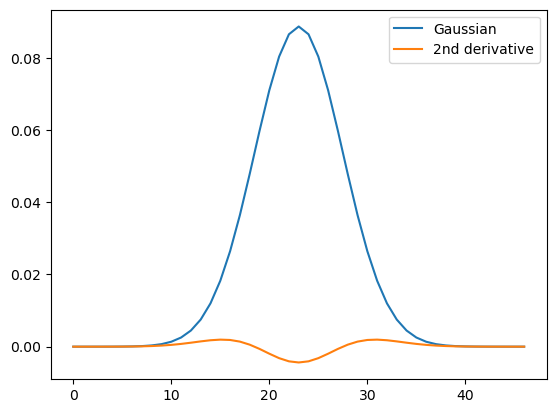

In [21]:
# Plot the Gaussian kernel and its derivatives
t = 20.25 # Variance
g, _, ddg, _ = get_gauss_derivatives(t)
plt.figure()
plt.plot(g, label='Gaussian')
plt.plot(ddg, label='2nd derivative')
plt.legend()
plt.show()

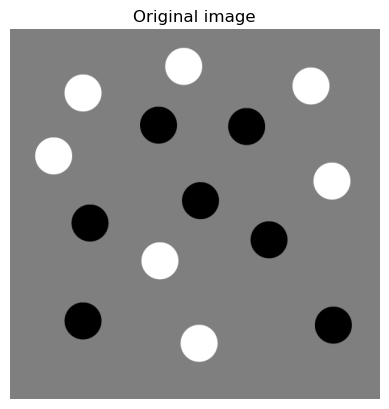

In [11]:
# Open the image
img = imread(data_path + 'test_blob_uniform.png')

# Show the image
plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

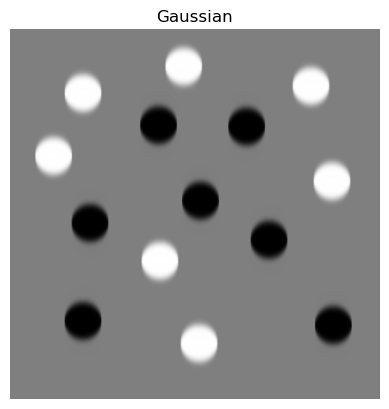

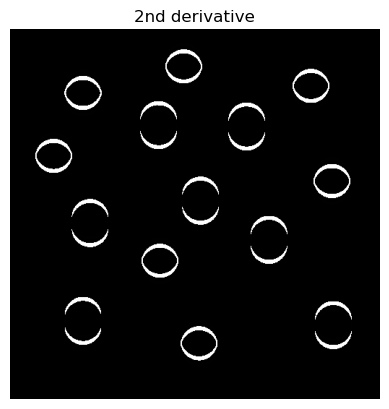

In [22]:
# Apply the Gaussian kernels to the image
# Apply the different kernels to the image
img_g = convolve(img, g.reshape(-1, 1))
img_ddg = convolve(img, ddg.reshape(-1, 1))

# Show the results
plt.figure()
plt.imshow(img_g, cmap='gray')
plt.title('Gaussian')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(img_ddg, cmap='gray')
plt.title('2nd derivative')
plt.axis('off')
plt.show()


# Detect blobs at one scale